In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
dataset=pd.read_excel('Book2.xlsx')

In [3]:
dataset.head(2)

,Annual Income,Age,Gender,Education,Location,Usage,Type of Product,Price Rang of Current Product,New Customer,Price Rang of Prev Product,Source,Tech Savvy,Mode of Purchase,Satisfaction,Customer Attrition
0,100k,18-22,M,High School,USA,Personal,PC,$500 - $700,1,$500 - $700,Direct,1,Online,8,1
1,80k,22-27,F,Undergraduate,UK,Professional,Laptop,Less than$500,1,Less than$500,Adwords,0,Direct,7,0


In [4]:
imputed_dataset=pd.read_excel('Final_Round_Imputed.xlsx')

In [5]:
y=imputed_dataset['PurchasedNewControlPanel']

In [6]:
imputed_dataset.drop('PurchasedNewControlPanel',axis=1,inplace=True)

In [7]:
imputed_dataset.head(2)

,Monitoring Plan,Age,Education,Gender,HomeImprovement,HomeMarketValue,HouseholdIncome,LengthofResidence,MaritalStatus,PresenceofChildren,Technology
0,Plan A,45-54,Completed College,Male,1,200k-250k,150k-175k,4 Years,Single,Yes,1
1,Plan B,35-44,Completed Graduate School,Male,1,250k-300k,125k-150k,1 Year,Married,Yes,1


In [8]:
X=pd.get_dummies(imputed_dataset)

In [9]:
X.head(2)

,HomeImprovement,Technology,Monitoring Plan_Plan A,Monitoring Plan_Plan B,Monitoring Plan_Plan C,Monitoring Plan_Plan D,Age_18-20,Age_21-24,Age_25-34,Age_35-44,...,LengthofResidence_5 Years,LengthofResidence_6 Years,LengthofResidence_7 Years,LengthofResidence_8 Years,LengthofResidence_9 Years,LengthofResidence_Less than 1 year,MaritalStatus_Married,MaritalStatus_Single,PresenceofChildren_No,PresenceofChildren_Yes
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [10]:
X.drop(['Gender_Male','MaritalStatus_Single','PresenceofChildren_No'],axis=1,inplace=True)

In [11]:
X.head(2)

,HomeImprovement,Technology,Monitoring Plan_Plan A,Monitoring Plan_Plan B,Monitoring Plan_Plan C,Monitoring Plan_Plan D,Age_18-20,Age_21-24,Age_25-34,Age_35-44,...,LengthofResidence_3 Years,LengthofResidence_4 Years,LengthofResidence_5 Years,LengthofResidence_6 Years,LengthofResidence_7 Years,LengthofResidence_8 Years,LengthofResidence_9 Years,LengthofResidence_Less than 1 year,MaritalStatus_Married,PresenceofChildren_Yes
0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [12]:
X['PurchasedNewControlPanel']=y

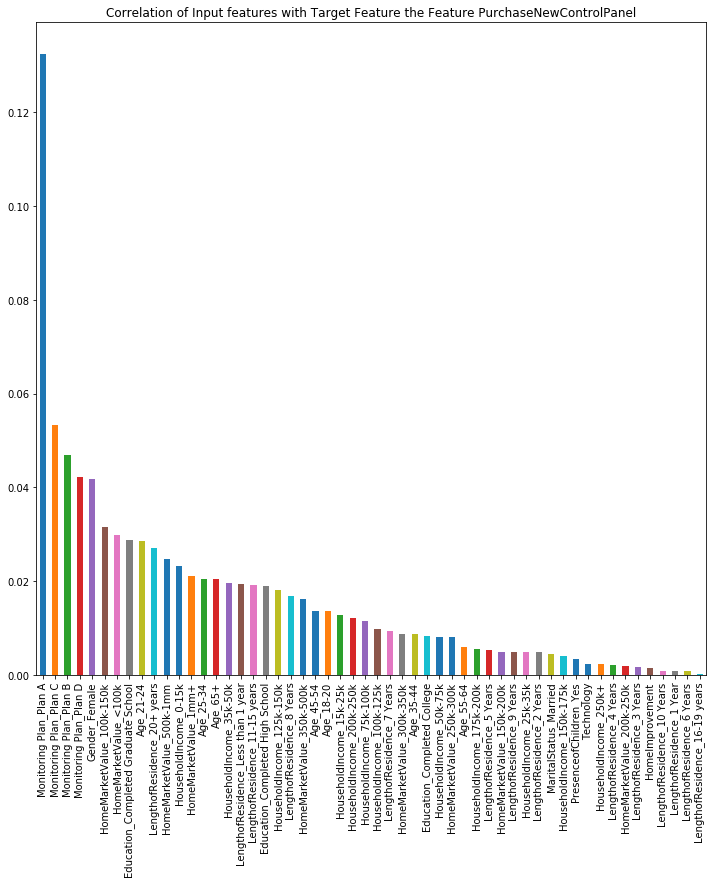

In [13]:
plt.figure(figsize=(12,12))
abs(X.corr().iloc[-1][:-1]).sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Input features with Target Feature the Feature PurchaseNewControlPanel')
plt.show()

In [14]:
X.drop('PurchasedNewControlPanel',axis=1,inplace=True)

In [15]:
X.shape,y.shape

((5000, 54), (5000,))

In [16]:
lr=LogisticRegression(class_weight='balanced')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
lr_clf=lr.fit(X_train,y_train)
y_predict=lr_clf.predict(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
report=classification_report(y_test,y_predict)

In [17]:
print(report)

             precision    recall  f1-score   support

          0       0.87      0.59      0.70       858
          1       0.16      0.46      0.23       142

avg / total       0.77      0.57      0.64      1000



In [18]:
tree=DecisionTreeClassifier(class_weight='balanced')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
tree_clf=tree.fit(X_train,y_train)
y_predict=tree_clf.predict(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
report=classification_report(y_test,y_predict)

In [19]:
print(report)

             precision    recall  f1-score   support

          0       0.85      0.84      0.84       845
          1       0.19      0.21      0.20       155

avg / total       0.75      0.74      0.74      1000



In [20]:
rmf=RandomForestClassifier(n_estimators=50,class_weight='balanced')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
rmf_clf=rmf.fit(X_train,y_train)
y_predict=rmf_clf.predict(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
report=classification_report(y_test,y_predict)

In [21]:
print(report)

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       836
          1       0.19      0.03      0.05       164

avg / total       0.73      0.82      0.76      1000



In [22]:
ext=ExtraTreesClassifier(n_estimators=50,class_weight='balanced')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
ext_clf=ext.fit(X_train,y_train)
y_predict=ext_clf.predict(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
report=classification_report(y_test,y_predict)

In [23]:
print(report)

             precision    recall  f1-score   support

          0       0.84      0.96      0.90       835
          1       0.27      0.07      0.11       165

avg / total       0.75      0.82      0.77      1000



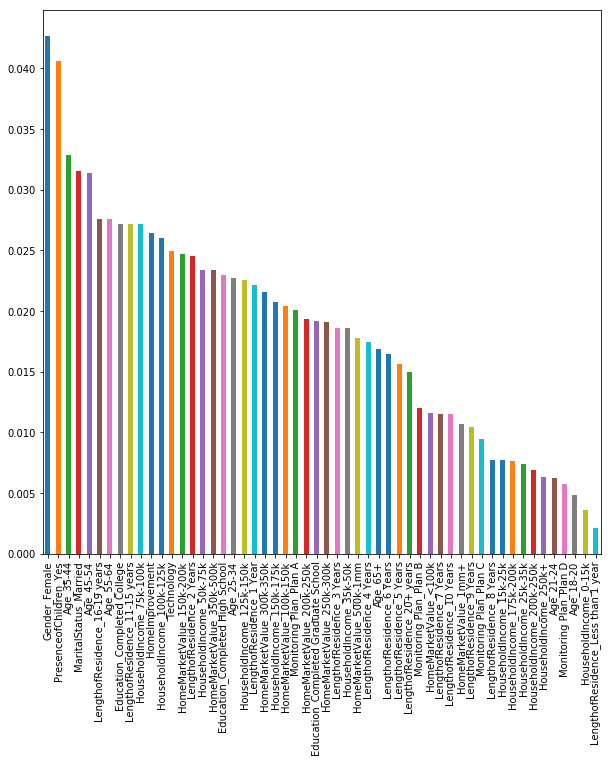

In [24]:
feat_imp=pd.Series(ext_clf.feature_importances_,index=X.columns)
plt.figure(figsize=(10,10))
abs(feat_imp.sort_values(ascending=False)).plot(kind='bar')
plt.show()

In [31]:
X['PurchasedNewControlPanel']=y

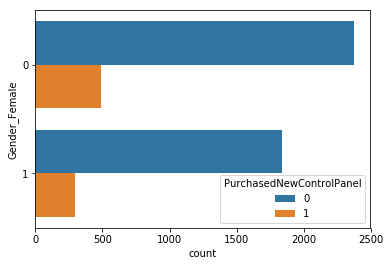

In [27]:
sns.countplot(y=X['Gender_Female'],hue=X['PurchasedNewControlPanel'])
plt.show()

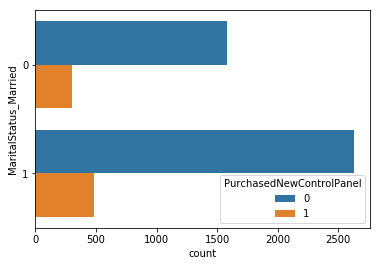

In [28]:
sns.countplot(y=X['MaritalStatus_Married'],hue=X['PurchasedNewControlPanel'])
plt.show()

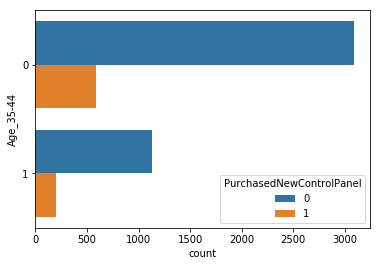

In [29]:
sns.countplot(y=X['Age_35-44'],hue=X['PurchasedNewControlPanel'])
plt.show()

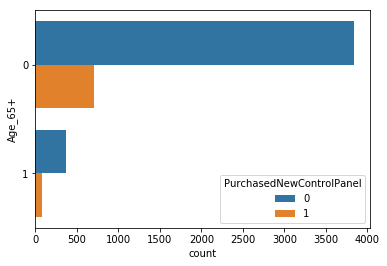

In [30]:
sns.countplot(y=X['Age_65+'],hue=X['PurchasedNewControlPanel'])
plt.show()